# Handwritten (A-Z) Character Recognition

###  Importing Libraries

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Reading Dataset and Analyzing it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/A_Z Handwritten Data.csv')

In [ ]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
data.shape

(372450, 785)

In [ ]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [ ]:
data.isnull().sum() #from below result it is clear that there are no null values

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [ ]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]])

### Splitting x and y column from dataset

In [ ]:
X = my_data[:,1:]
y = my_data[:,:1]

In [ ]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


### Split into train and validation set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(260715, 28, 28)
(111735, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(260715, 1)
(111735, 1)


### Plotting number of images for each alphabet from Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-18-b985f5c552b7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Alphabet', data=data, palette='cool')


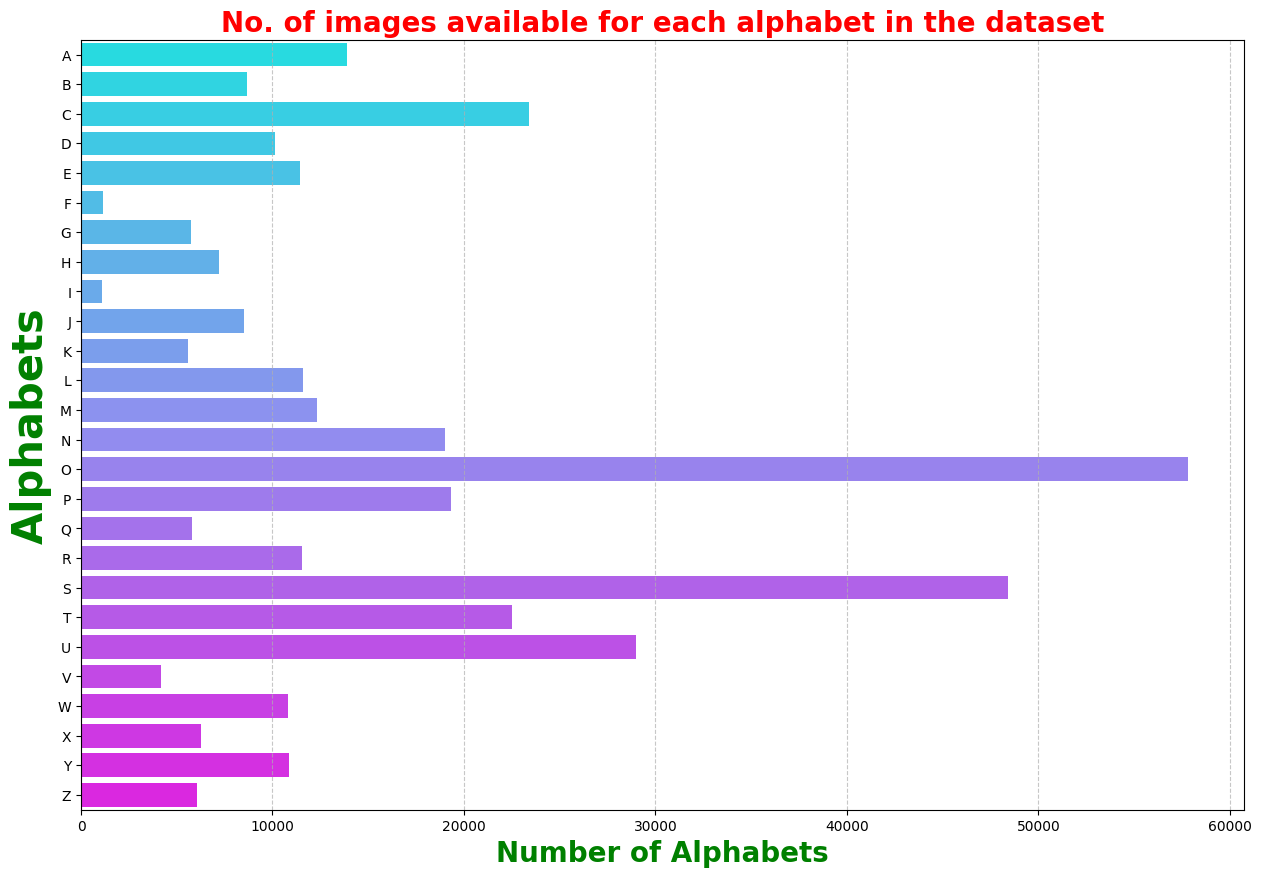

In [ ]:
# Plotting the number of alphabets in the dataset
# 1): Firstly we create a count list of 26 entries of zeroes and then count each label in y and append them in the count list
# 2): Now we create a list – alphabets containing all the characters
# 3): After that using the count & alphabets lists we draw the horizontal bar plot.

count = np.zeros(26, dtype = 'int') #count list containing all zeroes

#counting each label
for i in y:
    count[i] += 1

# Creating a list of alphabets
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# Assuming 'count' is a list or array with the number of images corresponding to each alphabet
# count = [values]  # Uncomment and replace [values] with the actual counts

# Create a DataFrame for better handling with seaborn
import pandas as pd
data = pd.DataFrame({'Alphabet': alphabets, 'Count': count})

plt.figure(figsize=(15,10))
sns.barplot(x='Count', y='Alphabet', data=data, palette='cool')

plt.xlabel("Number of Alphabets", fontsize=20, fontweight='bold', color='green')
plt.ylabel("Alphabets", fontsize=30, fontweight='bold', color='green')
plt.title("No. of images available for each alphabet in the dataset", fontsize=20, fontweight='bold', color='red')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Show random images

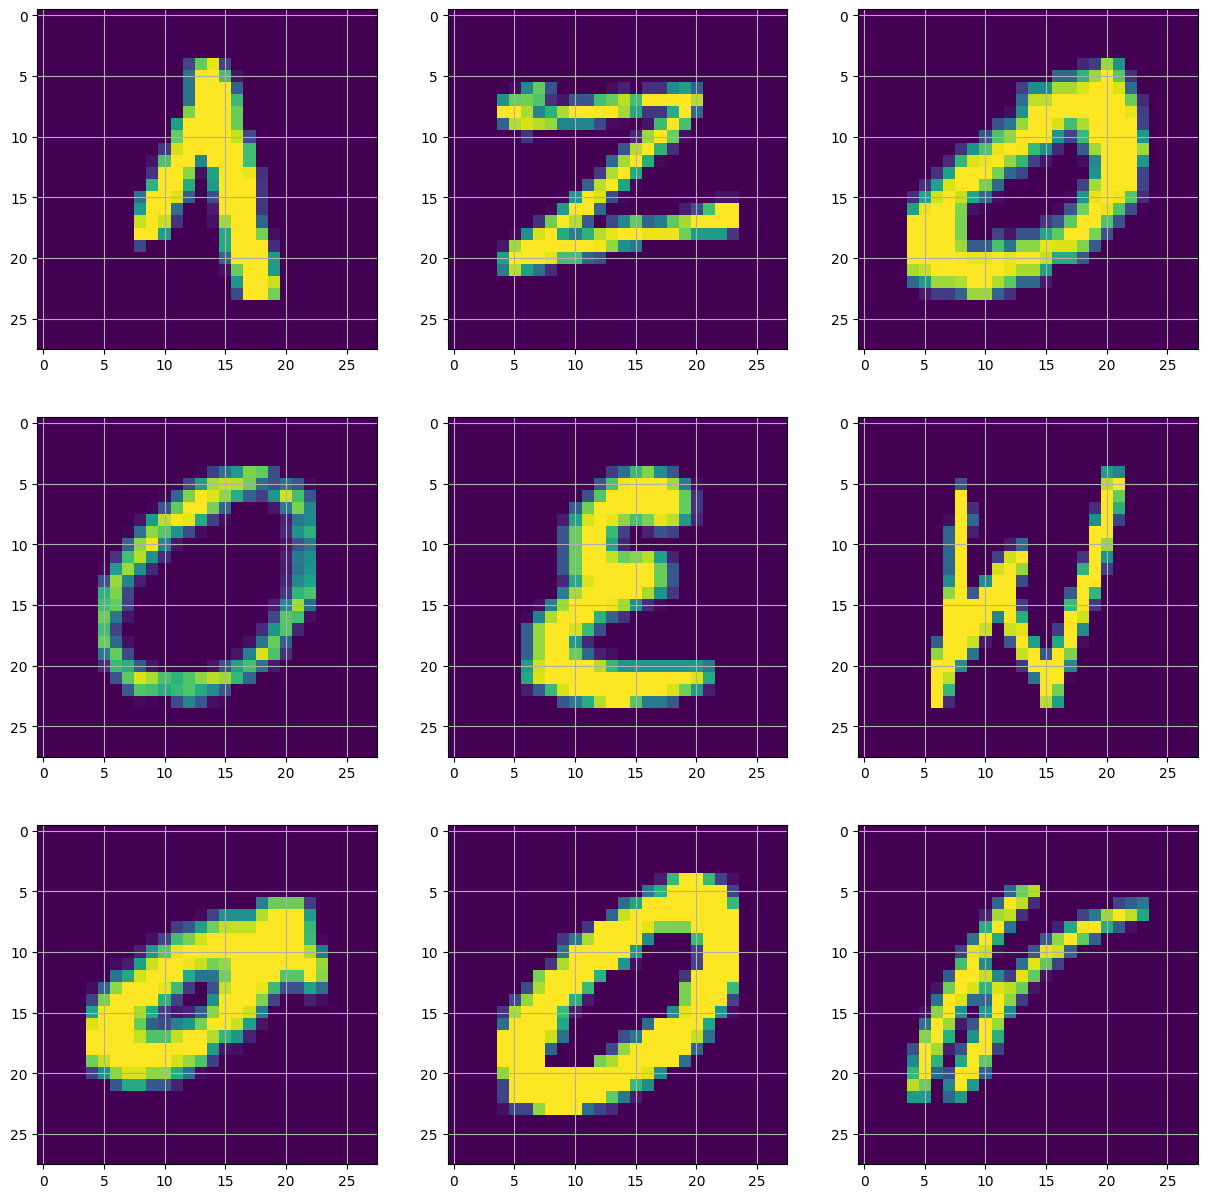

In [ ]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

### Reshaping train & test images from dataset to put in the CNN Model

In [ ]:
# Now we reshape the train & test image dataset so that they can be put in the model.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)

New shape of train and test dataset
(260715, 28, 28, 1)
(111735, 28, 28, 1)


### Normalizing the data(Downsampling) the images to make them in the range of (0-1)

In [ ]:
#downsampling the values
X_train = X_train/255.
X_test = X_test/255.

### Convert the int values of labels to categorical values of 26

In [ ]:
import numpy as np
from keras.utils import to_categorical

categorical_ytrain = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_ytrain.shape)

categorical_ytest = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (260715, 26)
New shape of test labels: (111735, 26)


### CNN Model Architecture

In [ ]:
model = Sequential()

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##### Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

##### Training the model and evaluate the performance on the holdout set:

In [ ]:
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

Epoch 1/100
8148/8148 [==============================] - ETA: 0s - loss: 0.1640 - accuracy: 0.9530
Epoch 1: val_accuracy improved from -inf to 0.98250, saving model to best_model.h5
8148/8148 [==============================] - 61s 7ms/step - loss: 0.1640 - accuracy: 0.9530 - val_loss: 0.0624 - val_accuracy: 0.9825
Epoch 2/100
  17/8148 [..............................] - ETA: 55s - loss: 0.0846 - accuracy: 0.9798

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8142/8148 [============================>.] - ETA: 0s - loss: 0.0640 - accuracy: 0.9821
Epoch 2: val_accuracy improved from 0.98250 to 0.98491, saving model to best_model.h5
8148/8148 [==============================] - 51s 6ms/step - loss: 0.0639 - accuracy: 0.9821 - val_loss: 0.0553 - val_accuracy: 0.9849
Epoch 3/100
8143/8148 [============================>.] - ETA: 0s - loss: 0.0488 - accuracy: 0.9864
Epoch 3: val_accuracy improved from 0.98491 to 0.98805, saving model to best_model.h5
8148/8148 [==============================] - 52s 6ms/step - loss: 0.0488 - accuracy: 0.9864 - val_loss: 0.0436 - val_accuracy: 0.9881
Epoch 4/100
8147/8148 [============================>.] - ETA: 0s - loss: 0.0402 - accuracy: 0.9884
Epoch 4: val_accuracy improved from 0.98805 to 0.98920, saving model to best_model.h5
8148/8148 [==============================] - 51s 6ms/step - loss: 0.0402 - accuracy: 0.9884 - val_loss: 0.0413 - val_accuracy: 0.9892
Epoch 5/100
8146/8148 [============================>.] 

In [ ]:

#evaluating model on test dataset
model.evaluate(X_test,categorical_ytest)

3492/3492 [==============================] - 10s 3ms/step - loss: 0.0436 - accuracy: 0.9921


[0.04356162250041962, 0.9920973777770996]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

### Find accuracy, losses of Model

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9920973777770996
The training accuracy is : 0.9949485063552856
The validation loss is : 0.04356162250041962
The training loss is : 0.018485786393284798


### Making prediction of test data

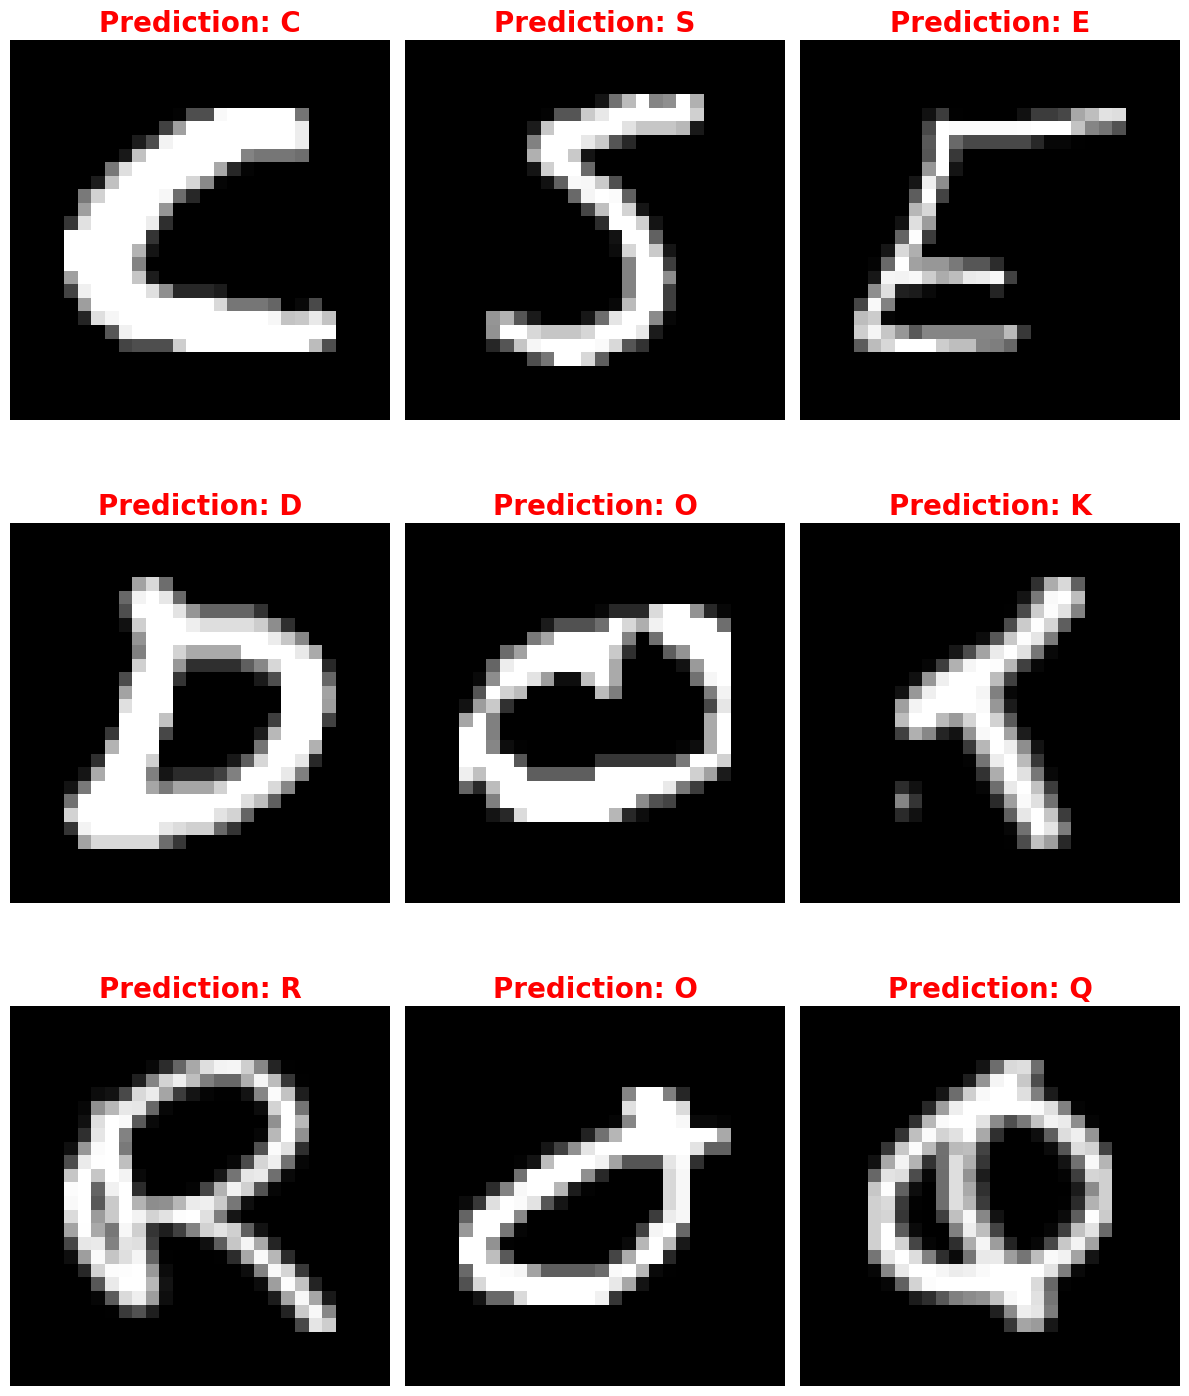

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Dictionary to map the index to corresponding alphabet
dict_word = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
             10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
             19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# Assuming X_test is your test dataset and model is your trained model
# Shuffle the test images
img_list_test = shuffle(X_test[:1000], random_state=42)

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 15))
axes = axes.flatten()

# Loop to display images and predictions
for i, ax in enumerate(axes):
    img = np.reshape(img_list_test[i], (28, 28))
    ax.imshow(img, cmap='gray')

    # Predict the label of the image
    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i], (1, 28, 28, 1)), verbose=0))]
    ax.set_title("Prediction: " + pred, fontsize=20, fontweight='bold', color='red')
    ax.axis('off')
    ax.grid(False)

plt.tight_layout()
plt.show()
